In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project_x/d4.csv")

In [ ]:
x= df.filter(["branch","pol_name","Frequency","Payment_Method","Premium"], axis=1)

In [ ]:
df

,Unnamed: 0,pol_id,owner_name,owner_DOB,LA,o_gen,Owner_Occupation,Organization_Type,Premium,ann_inc,...,pol_term,Frequency,Payment_Method,DOC,sum_assured,pol_sts,13 Month Persistency,Year 1 to Year 4,FPL,final_status
0,0,1,MR. DEVIDAS UDHARAM RAJWANI,90Jun072,Major,Male,Agriculture,Others,600000,7200000,...,20,Annual,Direct Bill,2/28/2019,6000000,Premium Paying,25th Month,Third Year,No,Unpaid
1,1,2,MR. DEVIDAS UDHARAM RAJWANI,90Jun072,Major,Male,Agriculture,Others,600000,7200000,...,10,Annual,Direct Bill,2/28/2019,6000000,Premium Paying,25th Month,Third Year,Yes,Unpaid
2,2,3,MR. VASUDEVAMURTHY R,200May074,Major,Male,Agriculture,Others,521475,6257700,...,5,Annual,Direct Bill,6/20/2019,7822125,Lapsed,13th Month,Second Year,Yes,Unpaid
3,3,4,MR. MANIYAN S,50Sep086,Major,Male,Agriculture,Others,501378,6016534,...,20,Annual,ECS,3/31/2018,10000000,Premium Paying,37th Month,Fourth Year,No,Unpaid
4,4,5,MR. RAMCHARAN RATHIA,100Jan083,Major,Male,Agriculture,Others,500000,6000000,...,8,Annual,ECS,11/29/2019,5000000,Discountinued Payout Pending,13th Month,Second Year,No,Unpaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2996,MR. LAV KUMAR PATEL,1/2/1971,Minor,Male,Service,Pvt. Ltd,51125,766875,...,5,Quarterly,ECS,3/31/2017,2045000,Premium Paying,49th Month,Fifth Year,Yes,Unpaid
2996,2996,2997,MRS VIDYA PRABHU PAI,6/15/1983,Minor,Female,Service,Pvt. Ltd,24933,373998,...,5,Monthly,ECS,11/2/2015,2991984,Premium Paying,61st Month,Greater than Fifth Year,Yes,Unpaid
2997,2997,2998,MRS. LAKSHMI SUJATHA AKASAM,7/12/1989,Minor,Female,Teacher / Professor,Public Ltd.,150000,1875000,...,10,Annual,Direct Bill,3/31/2017,1500000,Premium Paying,49th Month,Fifth Year,Yes,Unpaid
2998,2998,2999,MRS. MANJU YADAV,8/13/1981,Minor,Female,Teacher / Professor,Public Ltd.,150000,1875000,...,10,Annual,Direct Bill,3/23/2018,1500000,Premium Paying,37th Month,Fourth Year,Yes,Paid


In [ ]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
x['branch'] = number.fit_transform(x.branch)
x['Payment_Method'] = number.fit_transform(x.Payment_Method)
x['Frequency'] = number.fit_transform(x.Frequency)
x['pol_name'] = number.fit_transform(x.pol_name)


In [ ]:
x

,branch,pol_name,Frequency,Payment_Method,Premium
0,73,347,0,0,600000
1,58,66,0,0,600000
2,4,312,0,0,521475
3,4,68,0,1,501378
4,46,248,0,1,500000
...,...,...,...,...,...
2995,72,312,3,1,51125
2996,29,312,2,1,24933
2997,12,314,0,0,150000
2998,71,314,0,0,150000


In [ ]:
b="branch"
p="pol_name"
f="Frequency"
pm="Payment_Method"
X="Premium"

In [ ]:
x[X] = x[X] /x[X].abs().max()

#Spliting the data according to clustered data using  K-Means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Using Elbow method to find optimal number of clusters

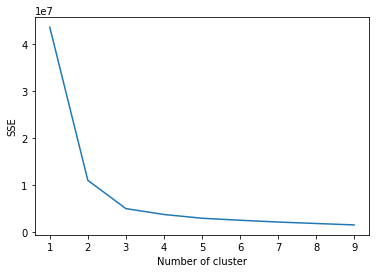

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x)
    x["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
km = KMeans(n_clusters = 3)

In [ ]:
y_predicted = km.fit_predict(x)

In [ ]:
x['cluster'] = y_predicted

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

Using PCA to to reduce dimensions

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

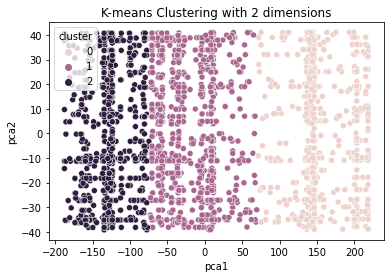

In [ ]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(x)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=x['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
x["fin_sts"]=df.final_status

In [ ]:
x[b] = x[b] /x[b].abs().max()
x[p] = x[p] /x[p].abs().max()
x[f] = x[f] /x[f].abs().max()
x[pm] = x[pm] /x[pm].abs().max()

Spliting the data according to the cluster

In [ ]:
branch0=[]
plname0=[]
freq0=[]
pay_meth0=[]
pr0=[]
sts0=[]
for i in range(3000):
    if x.cluster[i]==0:
        branch0.append(x.branch[i])
        plname0.append(x.pol_name[i])
        freq0.append(x.Frequency[i])
        pay_meth0.append(x.Payment_Method[i])
        pr0.append(x.Premium[i])
        sts0.append(x.fin_sts[i])

In [ ]:
df0=pd.DataFrame(branch0,columns=["Branch"])
df0["pl_name"]=plname0
df0["freq"]=freq0
df0["pay_meth"]=pay_meth0
df0["pr"]=pr0
df0["fin_sts"]=sts0

In [ ]:
df0

,Branch,pl_name,freq,pay_meth,pr,fin_sts
0,0.7250,0.162162,0.000000,0.0,0.606061,Unpaid
1,0.0500,0.167076,0.000000,1.0,0.506442,Unpaid
2,0.0625,0.154791,0.000000,1.0,0.505051,Unpaid
3,0.2000,0.029484,0.000000,1.0,0.505051,Paid
4,0.6000,0.027027,0.000000,1.0,0.505051,Paid
...,...,...,...,...,...,...
893,0.2625,0.039312,0.000000,1.0,0.101010,Unpaid
894,0.5750,0.039312,0.333333,0.0,0.100511,Unpaid
895,0.1125,0.147420,1.000000,1.0,0.099670,Paid
896,0.7250,0.039312,1.000000,1.0,0.099551,Paid


In [ ]:
branch1=[]
plname1=[]
freq1=[]
pay_meth1=[]
pr1=[]
sts1=[]

for i in range(3000):
    if x.cluster[i]==1:
        branch1.append(x.branch[i])
        plname1.append(x.pol_name[i])
        freq1.append(x.Frequency[i])
        pay_meth1.append(x.Payment_Method[i])
        pr1.append(x.Premium[i])
        sts1.append(x.fin_sts[i])


In [ ]:
df1=pd.DataFrame(branch1,columns=["Branch"])

In [ ]:
df1

,Branch
0,0.5750
1,0.0375
2,0.2000
3,0.0500
4,0.9750
...,...
1168,0.4625
1169,0.0750
1170,0.0625
1171,0.8875


In [ ]:
df1["pl_name"]=plname1
df1["freq"]=freq1
df1["pay_meth"]=pay_meth1
df1["pr"]=pr1
df1["fin_sts"]=sts1


In [ ]:
df1

,Branch,pl_name,freq,pay_meth,pr,fin_sts
0,0.5750,0.609337,0.000000,1.0,0.505051,Unpaid
1,0.0375,0.371007,0.000000,1.0,0.505051,Unpaid
2,0.2000,0.515971,0.333333,0.0,0.043771,Unpaid
3,0.0500,0.511057,0.333333,0.0,0.042929,Unpaid
4,0.9750,0.565111,0.666667,1.0,0.042055,Paid
...,...,...,...,...,...,...
1168,0.4625,0.528256,0.666667,1.0,0.041479,Unpaid
1169,0.0750,0.547912,0.333333,0.0,0.040284,Unpaid
1170,0.0625,0.714988,0.333333,0.0,0.040093,Unpaid
1171,0.8875,0.680590,0.000000,0.0,0.151515,Unpaid


In [ ]:
branch2=[]
plname2=[]
freq2=[]
pay_meth2=[]
pr2=[]
sts2=[]

for i in range(3000):
    if x.cluster[i]==2:
        branch2.append(x.branch[i])
        plname2.append(x.pol_name[i])
        freq2.append(x.Frequency[i])
        pay_meth2.append(x.Payment_Method[i])
        pr2.append(x.Premium[i])
        sts2.append(x.fin_sts[i])



In [ ]:
df2=pd.DataFrame(branch2,columns=["Branch"])
df2["pl_name"]=plname2
df2["freq"]=freq2
df2["pay_meth"]=pay_meth2
df2["pr"]=pr2
df2["fin_sts"]=sts2


In [ ]:
df2

,Branch,pl_name,freq,pay_meth,pr,fin_sts
0,0.9125,0.852580,0.000000,0.0,0.606061,Unpaid
1,0.0500,0.766585,0.000000,0.0,0.526742,Unpaid
2,0.3500,0.845209,0.000000,1.0,0.505051,Unpaid
3,0.6125,0.852580,0.000000,1.0,0.505051,Unpaid
4,0.4125,0.842752,0.000000,1.0,0.505051,Paid
...,...,...,...,...,...,...
924,0.9000,0.766585,1.000000,1.0,0.051641,Unpaid
925,0.3625,0.766585,0.666667,1.0,0.025185,Unpaid
926,0.1500,0.771499,0.000000,0.0,0.151515,Unpaid
927,0.8875,0.771499,0.000000,0.0,0.151515,Paid


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x0= df0.filter(["Branch","pl_name","freq","pay_meth","pr"], axis=1)
y0=df0.fin_sts

Using  Random Forest for predicting and finding the accuracy

In [ ]:
oversample = SMOTE()


In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1, 1), random_state=10)
rf.fit(X_train0, y_train0) 
y_pred_rf0=rf.predict(X_test0)
acc0=accuracy_score(y_pred_rf0,y_test0)
acc0

0.7104377104377104

In [ ]:
x1= df1.filter(["Branch","pl_name","freq","pay_meth","pr"], axis=1)
y1=df1.fin_sts
#x1,y1= oversample.fit_resample(x1,y1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train1, y_train1) 
y_pred_rf1=rf.predict(X_test1)
acc1=accuracy_score(y_pred_rf1,y_test1)
acc1

0.6443298969072165

In [ ]:
x2= df2.filter(["Branch","pl_name","freq","pay_meth","pr"], axis=1)
y2=df2.fin_sts
#x2,y2= oversample.fit_resample(x2,y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train2, y_train2) 
y_pred_rf2=rf.predict(X_test2)
acc2=accuracy_score(y_pred_rf2,y_test2)
acc2

0.6677524429967426

In [ ]:
ppt=df.filter(["pay_term","pol_term","sum_assured","ann_inc","Premium"], axis=1)

In [ ]:
ppt

,pay_term,pol_term,sum_assured,ann_inc,Premium
0,10,20,6000000,7200000,600000
1,5,10,6000000,7200000,600000
2,5,5,7822125,6257700,521475
3,20,20,10000000,6016534,501378
4,8,8,5000000,6000000,500000
...,...,...,...,...,...
2995,5,5,2045000,766875,51125
2996,5,5,2991984,373998,24933
2997,10,10,1500000,1875000,150000
2998,10,10,1500000,1875000,150000


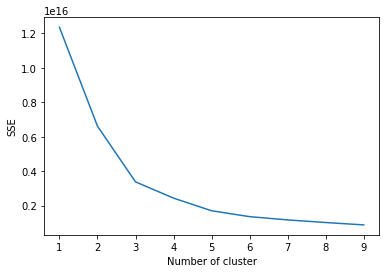

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ppt)
    ppt["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
y_predicted = km.fit_predict(ppt)
ppt["cluster"]=y_predicted

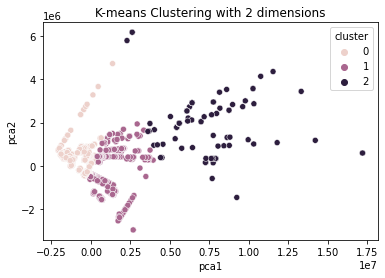

In [ ]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(ppt)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=ppt['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
ppt["fin_sts"]=df.final_status

In [ ]:
ppt

,pay_term,pol_term,sum_assured,ann_inc,Premium,clusters,cluster,fin_sts
0,10,20,6000000,7200000,600000,6,2,Unpaid
1,5,10,6000000,7200000,600000,6,2,Unpaid
2,5,5,7822125,6257700,521475,2,2,Unpaid
3,20,20,10000000,6016534,501378,2,2,Unpaid
4,8,8,5000000,6000000,500000,6,2,Unpaid
...,...,...,...,...,...,...,...,...
2995,5,5,2045000,766875,51125,4,0,Unpaid
2996,5,5,2991984,373998,24933,8,1,Unpaid
2997,10,10,1500000,1875000,150000,5,0,Unpaid
2998,10,10,1500000,1875000,150000,5,0,Paid


In [ ]:
pt0=[]
pot0=[]
sa0=[]
ai0=[]
pr0=[]
fs0=[]
for i in range(3000):
    if ppt.cluster[i]==0:
        pt0.append(ppt.pay_term[i])
        pot0.append(ppt.pol_term[i])
        sa0.append(ppt.sum_assured[i])
        ai0.append(ppt.ann_inc[i])
        pr0.append(ppt.Premium[i])
        fs0.append(ppt.fin_sts[i])
        
p0=pd.DataFrame(pt0,columns=["pay_term"])
p0["pol_term"]=pot0
p0["sum_assured"]=sa0
p0["ann_inc"]=ai0
p0["premium"]=pr0
p0["final_sts"]=fs0



In [ ]:
pt1=[]
pot1=[]
sa1=[]
ai1=[]
pr1=[]
fs1=[]
for i in range(3000):
    if ppt.cluster[i]==1:
        pt1.append(ppt.pay_term[i])
        pot1.append(ppt.pol_term[i])
        sa1.append(ppt.sum_assured[i])
        ai1.append(ppt.ann_inc[i])
        pr1.append(ppt.Premium[i])
        fs1.append(ppt.fin_sts[i])
        
p1=pd.DataFrame(pt1,columns=["pay_term"])
p1["pol_term"]=pot1
p1["sum_assured"]=sa1
p1["ann_inc"]=ai1
p1["premium"]=pr1
p1["final_sts"]=fs1



In [ ]:
pt2=[]
pot2=[]
sa2=[]
ai2=[]
pr2=[]
fs2=[]
for i in range(3000):
    if ppt.cluster[i]==2:
        pt2.append(ppt.pay_term[i])
        pot2.append(ppt.pol_term[i])
        sa2.append(ppt.sum_assured[i])
        ai2.append(ppt.ann_inc[i])
        pr2.append(ppt.Premium[i])
        fs2.append(ppt.fin_sts[i])
        
p2=pd.DataFrame(pt2,columns=["pay_term"])
p2["pol_term"]=pot2
p2["sum_assured"]=sa2
p2["ann_inc"]=ai2
p2["premium"]=pr2
p2["final_sts"]=fs2



In [ ]:
x00=p0.filter(["pay_term","pol_term","sum_assured","ann_inc","Premium"], axis=1)
y00=p0.final_sts


In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(x00, y00, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = AdaBoostClassifier(n_estimators = 5, learning_rate = 0.2)
rf.fit(X_train0, y_train0) 
y_pred_rf0=rf.predict(X_test0)
acc10=accuracy_score(y_pred_rf0,y_test0)
acc10

0.6738410596026491

In [ ]:
x01=p1.filter(["pay_term","pol_term","sum_assured","ann_inc","Premium"], axis=1)
y01=p1.final_sts


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x01, y01, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train1, y_train1) 
y_pred_rf1=rf.predict(X_test1)
acc11=accuracy_score(y_pred_rf1,y_test1)
acc11

0.6363636363636364

In [ ]:
x02=p2.filter(["pay_term","pol_term","sum_assured","ann_inc","Premium"], axis=1)
y02=p2.final_sts


In [ ]:
X_train02, X_test02, y_train02, y_test02 = train_test_split(x02, y02, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train02, y_train02) 
y_pred_rf02=rf.predict(X_test02)
acc12=accuracy_score(y_pred_rf02,y_test02)
acc12

0.7714285714285715

In [ ]:
x=ppt.filter(["pay_term","pol_term","sum_assured","ann_inc","Premium"], axis=1)
x

,pay_term,pol_term,sum_assured,ann_inc,Premium
0,10,20,6000000,7200000,600000
1,5,10,6000000,7200000,600000
2,5,5,7822125,6257700,521475
3,20,20,10000000,6016534,501378
4,8,8,5000000,6000000,500000
...,...,...,...,...,...
2995,5,5,2045000,766875,51125
2996,5,5,2991984,373998,24933
2997,10,10,1500000,1875000,150000
2998,10,10,1500000,1875000,150000


In [ ]:
y=ppt.fin_sts
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=5)
rf.fit(X_train, y_train) 
y_pred_rf=rf.predict(X_test)
acc=accuracy_score(y_pred_rf,y_test)
acc

0.6616161616161617

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_pred_svm=clf.predict(X_test)
acc=accuracy_score(y_pred_svm,y_test)
acc

0.6555555555555556

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
model = BalancedRandomForestClassifier(n_estimators=5)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train1, y_train1, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
from collections import Counter

counter = Counter(y)
print(counter)


Counter({'Unpaid': 1965, 'Paid': 1035})


In [ ]:
import numpy as np
from matplotlib import pyplot


In [ ]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(x)
xd= pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [ ]:
xx=(xd-xd.min())/(xd.max()-xd.min())

In [ ]:
xx

,pca1,pca2
0,0.469451,0.547737
1,0.469451,0.547737
2,0.509258,0.339435
3,0.586853,0.164197
4,0.389373,0.519011
...,...,...
2995,0.095497,0.293500
2996,0.119487,0.193352
2997,0.111628,0.424677
2998,0.111628,0.424677


In [ ]:
xx= xx.to_numpy()

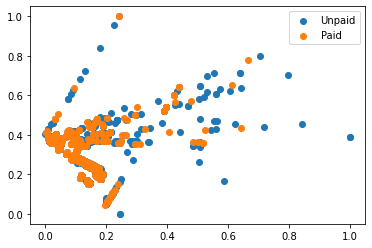

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(xx[row_ix, 0], xx[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
oversample = SMOTE()
xn, yn= oversample.fit_resample(x, y)

In [ ]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(xn)
xd= pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [ ]:
xy=(xd-xd.min())/(xd.max()-xd.min())

In [ ]:
xy= xy.to_numpy()

In [ ]:
m2_acc=(acc10+acc11+acc12)/3

In [ ]:
m1_acc=(acc0+acc1+acc2)/3

In [ ]:
m1_acc
m2_acc

0.6938777557982857

In [ ]:
y = number.fit_transform(y)


Using Deep leaning model to predict and find accuracy

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1, 1), random_state=10)
clf=clf.fit(X_train,y_train)

In [ ]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
y_pred_mlp=clf.predict(X_test)

In [ ]:
y_pred_mlp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
acc_mlp=accuracy_score(y_pred_mlp,y_test)
acc_mlp

0.6565656565656566

# Finding the accuracy of Service data and predicting whether the customer pays on time or not

In [ ]:
dp=pd.read_csv("/content/drive/MyDrive/project_x/clean1 SD - clean1 SD.csv")

In [ ]:
dp

,Teamresolution_Status,Resolution_Comment1,Call_Type,Category,process_group,RCA Comments,FTR,sub_type,Status_Reason,Teamresolution_Status.1
0,Processed Successfully,Request has been processed,Pending Policy changes,Request,Pre issuance,mobile no. updated as per client request,No,Changes in Profile Details,Resolved,Processed Successfully
1,Processed Successfully,Request has been processed,Pending Policy changes,Request,Pre issuance,wrong requirement raised shortage has been can...,No,Rectification in Policy level Details,Resolved,Processed Successfully
2,Processed Successfully,Request has been processed,Refund related,Request,Post issuance,"Amount moved to client id, Refund released aft...",No,Hold refund,Resolved,Processed Successfully
3,Processed Successfully,Request has been processed,Pending Policy changes,Request,Pre issuance,CORRECTLY UPDATED ANNUAL INCOME AS PER CLIENT ...,No,Changes in Profile Details,Resolved,Processed Successfully
4,Processed Successfully,Request has been processed,Refund related,Request,Post issuance,"Amount moved to client id, Refund released aft...",No,Hold refund,Resolved,Processed Successfully
...,...,...,...,...,...,...,...,...,...,...
17746,Processed Successfully,Request has been processed,Profile update,Request,Non Financial,Client Name Change Date: 30-05-2022 Last Upd...,Yes,Name change,Resolved,Processed Successfully
17747,Processed Successfully,Request has been processed,Profile update,Request,Non Financial,Client Name Change Date: 30-05-2022 Last Upd...,Yes,Name correction,Resolved,Processed Successfully
17748,Processed Successfully,Request has been processed,Policy related changes,Request,Policy Servicing,01 001 8816775256 BASAVVA ASHOK BARAGALI O...,No,Nominee change,Resolved,Processed Successfully
17749,Processed Successfully,Request has been processed,Policy related changes,Request,Policy Servicing,01 001 1844933364 PRANTIK GHOSH Ordinary ...,No,Nominee change,Resolved,Processed Successfully


In [ ]:
x= dp.filter(["Teamresolution_Status","Resolution_Comment1","Category","process_group","FTR","sub_type"], axis=1)
x

,Teamresolution_Status,Resolution_Comment1,Category,process_group,FTR,sub_type
0,Processed Successfully,Request has been processed,Request,Pre issuance,No,Changes in Profile Details
1,Processed Successfully,Request has been processed,Request,Pre issuance,No,Rectification in Policy level Details
2,Processed Successfully,Request has been processed,Request,Post issuance,No,Hold refund
3,Processed Successfully,Request has been processed,Request,Pre issuance,No,Changes in Profile Details
4,Processed Successfully,Request has been processed,Request,Post issuance,No,Hold refund
...,...,...,...,...,...,...
17746,Processed Successfully,Request has been processed,Request,Non Financial,Yes,Name change
17747,Processed Successfully,Request has been processed,Request,Non Financial,Yes,Name correction
17748,Processed Successfully,Request has been processed,Request,Policy Servicing,No,Nominee change
17749,Processed Successfully,Request has been processed,Request,Policy Servicing,No,Nominee change


In [ ]:
y=dp.Status_Reason

In [ ]:
y

0        Resolved
1        Resolved
2        Resolved
3        Resolved
4        Resolved
           ...   
17746    Resolved
17747    Resolved
17748    Resolved
17749    Resolved
17750    Resolved
Name: Status_Reason, Length: 17751, dtype: object

In [ ]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
x['Teamresolution_Status'] = number.fit_transform(x.Teamresolution_Status)
x['Resolution_Comment1'] = number.fit_transform(x.Resolution_Comment1)
x['Category'] = number.fit_transform(x.Category)
x['process_group'] = number.fit_transform(x.process_group)
x['FTR'] = number.fit_transform(x.FTR)
x['sub_type'] = number.fit_transform(x.sub_type)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Using Decission tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
clf = tree.DecisionTreeClassifier()
dt = clf.fit(X_train, y_train)
y_pred=dt.predict(X_test)
acc=accuracy_score(y_test, y_pred)

In [ ]:
acc

0.998463639467395

Confusion matrix for DT model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 589,    4],
       [   5, 5260]])

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
acc_rf=accuracy_score(y_pred_rf,y_test)


In [ ]:
acc_rf

0.9982929327415501

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred_rf)

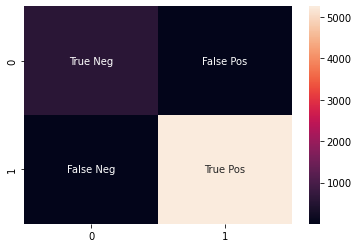

In [ ]:
import seaborn as sns
import numpy as np
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='')

Using transaction data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project_x/tree_data1.csv")

In [ ]:
df

,Pol Cst0t C0,Bucket,Receipted Amout received,Next due date move,Next Due date gr curr dt,Due Date change,Receipt Premium Not 0,Final_Status
0,1,Grace,0,0,0,1,0,Unpaid
1,0,Lapsed,0,0,0,0,0,Unpaid
2,0,Lapsed,0,0,0,0,0,Unpaid
3,0,Lapsed,0,0,0,0,0,Unpaid
4,0,Lapsed,0,0,0,0,0,Unpaid
...,...,...,...,...,...,...,...,...
29850,0,Lapsed,0,0,0,1,0,Unpaid
29851,1,Lapsed,0,1,1,0,0,Paid
29852,0,Lapsed,0,0,0,1,0,Unpaid
29853,0,Lapsed,0,0,0,1,0,Unpaid


In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
x=df.filter(["Pol Cst0t C0","Bucket","Receipted Amout received","Next due date move","Next Due date gr curr dt","Due Date change","Receipt Premium Not 0"], axis=1)

In [ ]:
y=df.Final_Status

In [ ]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
x['Bucket'] = number.fit_transform(x.Bucket)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
clf=RandomForestClassifier(max_depth=5, random_state=0)
dt = clf.fit(X_train, y_train)
y_pred=dt.predict(X_test)
acc=accuracy_score(y_test, y_pred)

acc

0.999888355476164

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2625,    0,    0],
       [   1,    0,    0],
       [   0,    0, 6331]])

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)

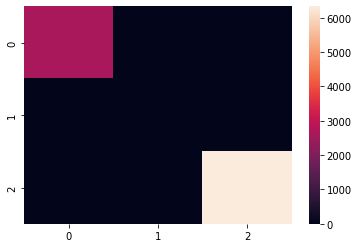

In [ ]:
import seaborn as sns
import numpy as np

sns.heatmap(cf_matrix,fmt='')

#using NLP for NPS data

In [ ]:
dp=pd.read_csv("/content/drive/MyDrive/project_x/nps_sorted_1.csv")

In [ ]:
dp

,nps_score,nps_cat,L1,L2,L3,sentiment,additional_comments,FAR,closure_col,Transaction Type,Transaction Branch,Source of Feedback,Sales Channel,DSF NewZone,DSF NewReg
0,7,Passive,Application Process,Document collection,NaN,Netural / Negative,All the documents required for policy issuanc...,No,NaN,Onboarding,NaN,Direct Call,DM,NaN,NaN
1,9,Promoter,Servicing,Website,Website Experience - Service options available,Positive,"Customer: I like website services, it is user...",No,NaN,Onboarding,NaN,Direct Call,TPD,0,0
2,9,Promoter,Branch,Behaviour,Operations related,Positive,"I am happy with your â€œAhmednagar,Maharashtr...",No,NaN,ONLINE,132.0,Direct Call,DSF,West-1,Pune Region
3,10,Promoter,Communication,Premium Paid Certificate / Renewal Receipt / T...,Email,Netural / Negative,please send us our policy statements regularl...,No,NaN,ONLINE,886.0,Direct Call,DSF,North-2,Kanpur region
4,8,Passive,Servicing,Sales Related,Post Sales Support - No contact by Agent with ...,Positive,"the advisor service is good, very helpful, so...",No,NaN,Renewal Premium,950.0,Direct Call,DSF,North-1,Jaipur Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,6,Detractor,Renewal,Communication - SMS - Not Received,Renewal reminder,Positive,your service is good like I am getting premium...,No,NaN,Renewal Premium,135.0,Direct Call,DSF,West-1,Pune Region
6020,9,Promoter,Medical Related,Other,NaN,Positive,Your service is good like post issuance medica...,No,NaN,Renewal Premium,629.0,Direct Call,DSF,Central,Indore Region
6021,9,Promoter,Exit,Claims,Too much time taken to receive claims amount,Positive,your service is prompt like we had claim and i...,No,NaN,ONLINE,NaN,Direct Call,TPD,0,0
6022,9,Promoter,Renewal,Communication - SMS - Not Received,Payment confirmation / acknowledgement,Positive,Your services are good like after paid the pre...,No,NaN,Renewal Premium,969.0,Direct Call,DSF,North-1,Jaipur Region


In [ ]:
x= dp.filter(["nps_cat","L1","L2","L3","sentiment","FAR"], axis=1)

In [ ]:
x

,nps_cat,L1,L2,L3,sentiment,FAR
0,Passive,Application Process,Document collection,NaN,Netural / Negative,No
1,Promoter,Servicing,Website,Website Experience - Service options available,Positive,No
2,Promoter,Branch,Behaviour,Operations related,Positive,No
3,Promoter,Communication,Premium Paid Certificate / Renewal Receipt / T...,Email,Netural / Negative,No
4,Passive,Servicing,Sales Related,Post Sales Support - No contact by Agent with ...,Positive,No
...,...,...,...,...,...,...
6019,Detractor,Renewal,Communication - SMS - Not Received,Renewal reminder,Positive,No
6020,Promoter,Medical Related,Other,NaN,Positive,No
6021,Promoter,Exit,Claims,Too much time taken to receive claims amount,Positive,No
6022,Promoter,Renewal,Communication - SMS - Not Received,Payment confirmation / acknowledgement,Positive,No


In [ ]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
x['nps_cat'] = number.fit_transform(x.nps_cat)
x['L1'] = number.fit_transform(x.L1)
x['L2'] = number.fit_transform(x.L2)
x['L3'] = number.fit_transform(x.L3)
x['sentiment'] = number.fit_transform(x.sentiment)
x['FAR'] = number.fit_transform(x.FAR)




In [ ]:
x

,nps_cat,L1,L2,L3,sentiment,FAR
0,1,1,55,235,0,0
1,2,27,160,228,1,0
2,2,2,7,147,1,0
3,2,7,127,94,0,0
4,1,27,142,177,1,0
...,...,...,...,...,...,...
6019,0,23,38,194,1,0
6020,2,17,100,235,1,0
6021,2,12,21,219,1,0
6022,2,23,38,156,1,0


Using vader lexicon to assign a score for review text data and using it for prediction

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in dp['additional_comments']]
dp['sentiment_score'] = polarity
dp

,nps_score,nps_cat,L1,L2,L3,sentiment,additional_comments,FAR,closure_col,Transaction Type,Transaction Branch,Source of Feedback,Sales Channel,DSF NewZone,DSF NewReg,sentiment_score
0,7,Passive,Application Process,Document collection,NaN,Netural / Negative,All the documents required for policy issuanc...,No,NaN,Onboarding,NaN,Direct Call,DM,NaN,NaN,0.00
1,9,Promoter,Servicing,Website,Website Experience - Service options available,Positive,"Customer: I like website services, it is user...",No,NaN,Onboarding,NaN,Direct Call,TPD,0,0,0.69
2,9,Promoter,Branch,Behaviour,Operations related,Positive,"I am happy with your â€œAhmednagar,Maharashtr...",No,NaN,ONLINE,132.0,Direct Call,DSF,West-1,Pune Region,0.89
3,10,Promoter,Communication,Premium Paid Certificate / Renewal Receipt / T...,Email,Netural / Negative,please send us our policy statements regularl...,No,NaN,ONLINE,886.0,Direct Call,DSF,North-2,Kanpur region,0.64
4,8,Passive,Servicing,Sales Related,Post Sales Support - No contact by Agent with ...,Positive,"the advisor service is good, very helpful, so...",No,NaN,Renewal Premium,950.0,Direct Call,DSF,North-1,Jaipur Region,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,6,Detractor,Renewal,Communication - SMS - Not Received,Renewal reminder,Positive,your service is good like I am getting premium...,No,NaN,Renewal Premium,135.0,Direct Call,DSF,West-1,Pune Region,0.81
6020,9,Promoter,Medical Related,Other,NaN,Positive,Your service is good like post issuance medica...,No,NaN,Renewal Premium,629.0,Direct Call,DSF,Central,Indore Region,0.81
6021,9,Promoter,Exit,Claims,Too much time taken to receive claims amount,Positive,your service is prompt like we had claim and i...,No,NaN,ONLINE,NaN,Direct Call,TPD,0,0,0.36
6022,9,Promoter,Renewal,Communication - SMS - Not Received,Payment confirmation / acknowledgement,Positive,Your services are good like after paid the pre...,No,NaN,Renewal Premium,969.0,Direct Call,DSF,North-1,Jaipur Region,0.81


In [ ]:
x["senti_score"]=dp.sentiment_score

In [ ]:
y=dp.nps_score

In [ ]:
x

,nps_cat,L1,L2,L3,sentiment,FAR,senti_score
0,1,1,55,235,0,0,0.00
1,2,27,160,228,1,0,0.69
2,2,2,7,147,1,0,0.89
3,2,7,127,94,0,0,0.64
4,1,27,142,177,1,0,0.79
...,...,...,...,...,...,...,...
6019,0,23,38,194,1,0,0.81
6020,2,17,100,235,1,0,0.81
6021,2,12,21,219,1,0,0.36
6022,2,23,38,156,1,0,0.81


In [ ]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(x, y, test_size=0.33, random_state=42)

Using random forest for predicting NPS score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=10, random_state=10)
rf.fit(X_train0, y_train0) 
y_pred_rf0=rf.predict(X_test0)
acc0=accuracy_score(y_pred_rf0,y_test0)
acc0

0.5513078470824949

In [ ]:
x["nps_cat"] = x["nps_cat"] /x["nps_cat"].abs().max()
x["L1"] = x["L1"] /x["L1"].abs().max()
x["L2"] = x["L2"] /x["L2"].abs().max()
x["L3"] = x["L3"] /x["L3"].abs().max()
x["FAR"] = x["FAR"] /x["FAR"].abs().max()

In [ ]:
x

,nps_cat,L1,L2,L3,sentiment,FAR,senti_score
0,0.5,0.034483,0.333333,1.000000,0,0.0,0.00
1,1.0,0.931034,0.969697,0.970213,1,0.0,0.69
2,1.0,0.068966,0.042424,0.625532,1,0.0,0.89
3,1.0,0.241379,0.769697,0.400000,0,0.0,0.64
4,0.5,0.931034,0.860606,0.753191,1,0.0,0.79
...,...,...,...,...,...,...,...
6019,0.0,0.793103,0.230303,0.825532,1,0.0,0.81
6020,1.0,0.586207,0.606061,1.000000,1,0.0,0.81
6021,1.0,0.413793,0.127273,0.931915,1,0.0,0.36
6022,1.0,0.793103,0.230303,0.663830,1,0.0,0.81


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=10, random_state=10)
rf.fit(X_train0, y_train0) 
y_pred_rf0=rf.predict(X_test0)
acc0=accuracy_score(y_pred_rf0,y_test0)
acc0

0.5513078470824949

using NLP

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import spacy
nlp = spacy.load("en_core_web_lg")
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_selection import SelectFromModel
from imblearn.pipeline import Pipeline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/project_x/nps_nlp_final.csv")
data.head()

,text,target
0,"""Miss.suparna"" who is senior of my advisor ""M...",Passive
1,All the documents required for policy issuanc...,Passive
2,"Customer: I like website services, it is user...",Promoter
3,"I am happy with your ""Ahmednagar,Maharashtra""...",Promoter
4,please send us our policy statements regularl...,Promoter


In [ ]:
data.head()

,text,target
0,"""Miss.suparna"" who is senior of my advisor ""M...",Passive
1,All the documents required for policy issuanc...,Passive
2,"Customer: I like website services, it is user...",Promoter
3,"I am happy with your ""Ahmednagar,Maharashtra""...",Promoter
4,please send us our policy statements regularl...,Promoter


In [ ]:
data.shape

(6025, 2)

In [ ]:
data_split=np.array_split(data,20)
df=data_split[0].copy()
df2=data_split[1].copy()
df3=data_split[2]
df4=data_split[3]
df5=data_split[4]
df6=data_split[5]

In [ ]:
df=df.rename(columns={"class":"target"})

In [ ]:
df.head()

,text,target
0,"""Miss.suparna"" who is senior of my advisor ""M...",Passive
1,All the documents required for policy issuanc...,Passive
2,"Customer: I like website services, it is user...",Promoter
3,"I am happy with your ""Ahmednagar,Maharashtra""...",Promoter
4,please send us our policy statements regularl...,Promoter


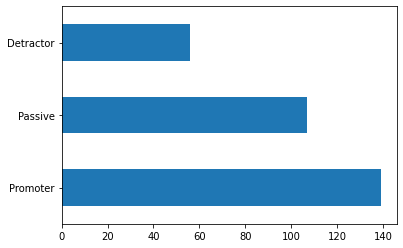

In [ ]:
df.target.value_counts().plot.barh()

In [ ]:
class TextPreprocessor(TransformerMixin):
    def __init__(self, text_attribute):
        self.text_attribute = text_attribute
        
    def transform(self,X, *_):
        X_copy=X.copy()
        X_copy[self.text_attribute]=X_copy[self.text_attribute].apply(self._preprocess_text)
        return X_copy
    
    def _preprocess_text(self,text):
        return self._lemmatize(self._leave_letters_only(self._clean(text)))
    
    def _clean(self,text):
        bad_symbols='!"#%&\'*+,-<=>?[\\]^_`{|}~'
        text_without_symbols=text.translate(str.maketrans('','',bad_symbols))

        text_without_bad_words=''
        for line in text_without_symbols.split('\n'):
            if not line.lower().startswith('from:') and not line.lower().endswith('writes:'):
                text_without_bad_words +=line + '\n'

        clean_text=text_without_bad_words
        email_regex=r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
        regexes_to_remove=[email_regex, r'Subject:', r'Re:']
        for r in regexes_to_remove:
            clean_text=re.sub(r,'', clean_text)
        return clean_text
    
    def _leave_letters_only(self, text):
        text_without_punctuation = text.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(re.findall("[a-zA-Z]+", text_without_punctuation))
    
    def _lemmatize(self,text):
        doc=nlp(text)
        words=[x.lemma_ for x in [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT' 
                                    and y.pos_ != 'PART' and y.pos_ != 'X']]
        return ' '.join(words)
    
    def fit(self, *_):
        return self

In [ ]:
text_preprocessor=TextPreprocessor(text_attribute='text')
df_preprocessed=text_preprocessor.transform(df)

In [ ]:
train,test=train_test_split(df_preprocessed,test_size=0.3)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(analyzer="word",max_features=10000)
X_tfidf_train=tfidf_vectorizer.fit_transform(train['text'])
X_tfidf_test=tfidf_vectorizer.transform(test['text'])

In [ ]:
y=train['target']
y_test=test['target']

In [ ]:
X,y=X_tfidf_train,y
X_test,y_test=X_tfidf_test,y_test

##Feature Scaling

In [ ]:
scaler=MinMaxScaler()
X_norm=scaler.fit_transform(X.toarray())
X_test_norm=scaler.transform(X_test.toarray())

## Feature Selection

In [ ]:
lsvc=LinearSVC(C=100,penalty='l1',max_iter=500,dual=False)
lsvc.fit(X_norm,y)
fs=SelectFromModel(lsvc,prefit=True)
X_sel=fs.transform(X_norm)
X_test_sel=fs.transform(X_test_norm)

In [ ]:
from IPython.display import Markdown, display
def show_top10_features(classifier, feature_names, categories):
    for i,category in enumerate(categories):
        top10=np.argsort(classifier.coef_[0, i])[-100:]

In [ ]:
feature_names=np.array(tfidf_vectorizer.get_feature_names())
show_top10_features(lsvc,feature_names, lsvc.classes_)

In [ ]:
print("New dataset shape: ",X_sel.shape)
print("Reduced Number of Features: ",X_norm.shape[1]-X_sel.shape[1])

New dataset shape:  (211, 204)
Reduced Number of Features:  77


## Predictive Models

In [ ]:
def print_confusion_matrix(confusion_matrix, 
                           class_names, 
                           figsize=(8,8), 
                           fontsize=12,
                           ylabel='True label',
                           xlabel='Predicted label'):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=fontsize)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [ ]:
def evaluate_model(model, X, y, X_test, y_test, target_names=None):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    scores_test = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
    
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    print("Accuracy test: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std()))
    
    print("Test classification report: ")
    if target_names is None:
        target_names = model.classes_
    print(classification_report(y_test, model.predict(X_test), target_names=target_names))
    print("Test confusion matrix: ")
    print_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)), class_names=target_names)

## Multinomial Naive Bayes

Accuracy: 0.53 (+/- 0.06)
Accuracy test: 0.44 (+/- 0.04)
Test classification report: 
              precision    recall  f1-score   support

   Detractor       0.33      0.12      0.17        17
     Passive       0.45      0.26      0.33        34
    Promoter       0.52      0.85      0.65        40

    accuracy                           0.49        91
   macro avg       0.44      0.41      0.38        91
weighted avg       0.46      0.49      0.44        91

Test confusion matrix: 


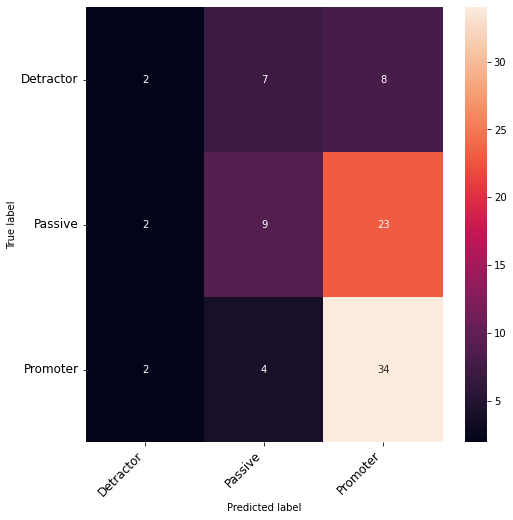

In [ ]:
mb=MultinomialNB()
mb.fit(X_sel, y)
evaluate_model(mb,X_sel,y,X_test_sel,y_test)

## Logistic Regression

Accuracy: 0.56 (+/- 0.04)
Accuracy test: 0.38 (+/- 0.05)
Test classification report: 
              precision    recall  f1-score   support

   Detractor       0.43      0.18      0.25        17
     Passive       0.47      0.41      0.44        34
    Promoter       0.57      0.78      0.66        40

    accuracy                           0.53        91
   macro avg       0.49      0.45      0.45        91
weighted avg       0.51      0.53      0.50        91

Test confusion matrix: 


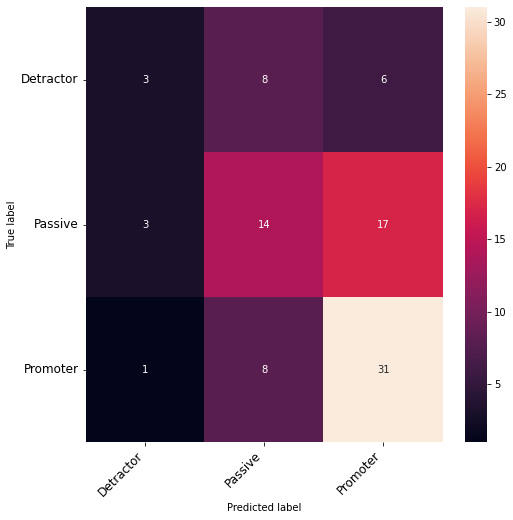

In [ ]:
lr=LogisticRegression(multi_class='ovr',solver='liblinear',C=10,penalty='l2')
lr.fit(X_sel,y)
evaluate_model(lr,X_sel,y,X_test_sel,y_test)

## SGDClassifier

Accuracy: 0.50 (+/- 0.02)
Accuracy test: 0.34 (+/- 0.05)
Test classification report: 
              precision    recall  f1-score   support

   Detractor       0.22      0.12      0.15        17
     Passive       0.45      0.41      0.43        34
    Promoter       0.55      0.70      0.62        40

    accuracy                           0.48        91
   macro avg       0.41      0.41      0.40        91
weighted avg       0.45      0.48      0.46        91

Test confusion matrix: 


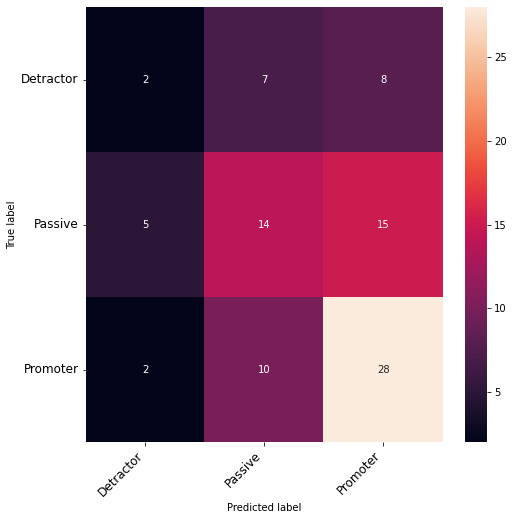

In [ ]:
sgd=SGDClassifier(alpha=.0001, max_iter=50, loss='log',penalty="elasticnet", n_jobs=-1)
sgd.fit(X_sel,y)
evaluate_model(sgd, X_sel, y, X_test_sel, y_test)

## Soft Voting

Accuracy: 0.54 (+/- 0.01)
Accuracy test: 0.38 (+/- 0.05)
Test classification report: 
              precision    recall  f1-score   support

   Detractor       0.33      0.18      0.23        17
     Passive       0.47      0.41      0.44        34
    Promoter       0.58      0.75      0.65        40

    accuracy                           0.52        91
   macro avg       0.46      0.45      0.44        91
weighted avg       0.49      0.52      0.49        91

Test confusion matrix: 


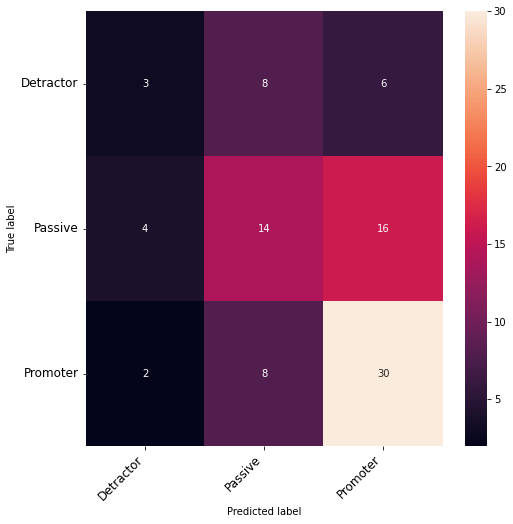

In [ ]:
vclf_sgd=VotingClassifier(estimators=[
        ('lr',LogisticRegression(multi_class='ovr',solver='liblinear',C=10,penalty='l2')),
        ('mb',MultinomialNB()),
        ('sgd',SGDClassifier(alpha=.0001,max_iter=50,loss='log',penalty="elasticnet"))],voting='soft',n_jobs=-1)
vclf_sgd.fit(X_sel,y)
evaluate_model(vclf_sgd,X_sel,y,X_test_sel,y_test)

#Creating Pipeline

In [ ]:
class TextPreprocessor(BaseEstimator,TransformerMixin):
    def __init__(self, text_attribute):
        self.text_attribute = text_attribute
    
    def fit(self,X,y=None):
        return self
        
    def transform(self,X, *_):
        X_copy = X.copy()
        return X_copy[self.text_attribute].apply(self._preprocess_text)
    
    def _preprocess_text(self, text):
        return self._lemmatize(self._leave_letters_only(self._clean(text)))
    
    def _clean(self, text):
        bad_symbols='!"#%&\'*+,-<=>?[\\]^_`{|}~'
        text_without_symbols = text.translate(str.maketrans('', '', bad_symbols))

        text_without_bad_words=''
        for line in text_without_symbols.split('\n'):
            if not line.lower().startswith('from:') and not line.lower().endswith('writes:'):
                text_without_bad_words += line + '\n'

        clean_text=text_without_bad_words
        email_regex=r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
        regexes_to_remove=[email_regex, r'Subject:', r'Re:']
        for r in regexes_to_remove:
            clean_tex=re.sub(r,'',clean_text)
        return clean_text
    
    def _leave_letters_only(self,text):
        text_without_punctuation=text.translate(str.maketrans('','',string.punctuation))
        return ' '.join(re.findall("[a-zA-Z]+", text_without_punctuation))
    
    def _lemmatize(self, text):
        doc=nlp(text)
        words=[x.lemma_ for x in [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT' and y.pos_ != 'PART' and y.pos_ != 'X']]
        return ' '.join(words)

In [ ]:
class DenseTransformer(TransformerMixin):
    def fit(self,X,y=None, **fit_params):
        return self

    def transform(self,X,y=None, **fit_params):
        return X.todense()

In [ ]:
text_classification_pipeline=Pipeline([
    ('text_preprocessor',TextPreprocessor(text_attribute='text')),
    ('vectorizer',TfidfVectorizer(analyzer = "word", max_features=10000)),
    ('todense_converter',DenseTransformer()),
    ('scaler',MinMaxScaler()),
    ('classifier',VotingClassifier(estimators=[
                        ('lr',LogisticRegression(multi_class='ovr', solver = 'liblinear', C=10, penalty = 'l2')),
                        ('mb',MultinomialNB()),
                        ('sgd',SGDClassifier(alpha=.0001, max_iter=50, loss='log', penalty="elasticnet"))], voting='soft', n_jobs=-1))])

# Testing Cases

In [ ]:
X_p=df2.drop(columns=["target"])
y_p=df2['target']
X_p.head()

,text
302,Agent collects the cheque and reminds about t...
303,Agent personally visited the customer to inqu...
304,Agent always inform about premium payment
305,agent always remind customer before 10 days fo...
306,agent always reminds about premium payment to ...


In [ ]:
pipeline=text_classification_pipeline
pipeline.fit(X_p,y_p)

Pipeline(steps=[('text_preprocessor', TextPreprocessor(text_attribute='text')),
                ('vectorizer', TfidfVectorizer(max_features=10000)),
                ('todense_converter',
                 <__main__.DenseTransformer object at 0x7fa76cd5c250>),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=10,
                                                                  multi_class='ovr',
                                                                  solver='liblinear')),
                                              ('mb', MultinomialNB()),
                                              ('sgd',
                                               SGDClassifier(loss='log',
                                                             max_iter=50,
                                                             penalty='elasticnet'))],
          

In [ ]:
y_pred=pipeline.predict(X_p)

In [ ]:
data=['i have had a bad experience in this company']
X_p_test=pd.DataFrame(data,columns=['text'])
X_p_test

,text
0,i have had a bad experience in this company


In [ ]:
y_test_pred=pipeline.predict(X_p_test)
print("PREDICTION:",y_test_pred)

PREDICTION: ['Passive']
